In [0]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive'
/content/drive/My Drive


# **Importing libraries**

In [0]:

!pip install textblob
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import string
import nltk

nltk.download('punkt')
nltk.download('wordnet')

nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk import word_tokenize, pos_tag

!pip install langdetect

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 
import pickle


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Name: tensorflow
Version: 2.2.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: wheel, grpcio, numpy, google-pasta, astunparse, scipy, gast, tensorboard, absl-py, opt-einsum, termcolor, six, tensorflow-estimator, h5py, protobuf, keras-preprocessing, wrapt
Requ

# **Loading csv**

In [0]:
train_data_path='kaggle/jigsaw-toxic-comment-classification-challenge/train.csv'


train = pd.read_csv(train_data_path,encoding='utf-8')
test = pd.read_csv('kaggle/jigsaw-toxic-comment-classification-challenge/test.csv',encoding='utf-8')

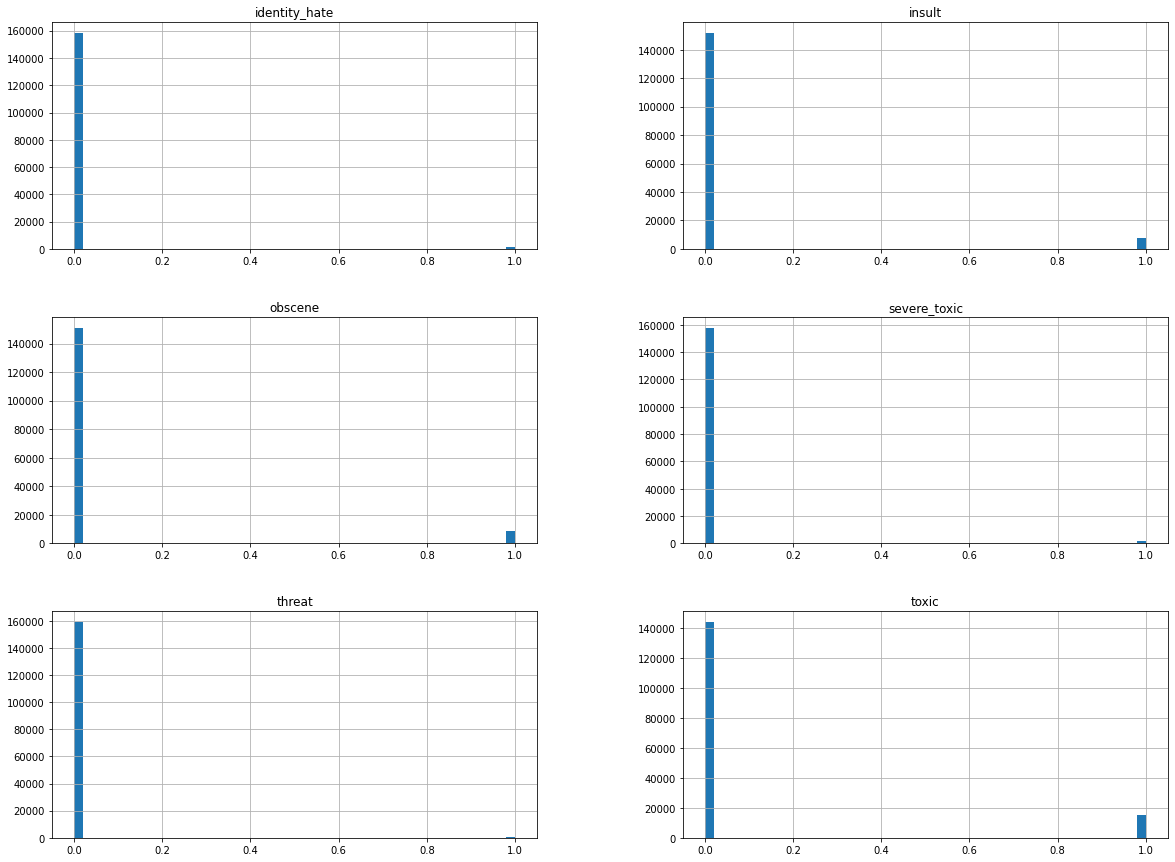

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

train.hist(bins=50,figsize=(20,15))
plt.show()

In [0]:
corr_matrix=train.corr()
corr_matrix['toxic'].sort_values(ascending=False)

toxic            1.000000
obscene          0.676515
insult           0.647518
severe_toxic     0.308619
identity_hate    0.266009
threat           0.157058
Name: toxic, dtype: float64

In [0]:
train_data=train[:500]
train_data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
495,014b44616d8cb457,"Sarek of Vulcan: Unfortunately for you, you ca...",0,0,0,0,0,0
496,014bb932bd289352,Keep your chin up! Darwinism was not accepted ...,0,0,0,0,0,0
497,014c96f873db11ff,"""""""Nazi filth"""" is impolite 04:27, 20 Jan 200...",1,0,0,0,1,0
498,014d00c8f2a76df4,Interesting. I checked the other case number K...,0,0,0,0,0,0


In [0]:
train_data.drop(['id'],axis=1,inplace=True)
train_data

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
495,"Sarek of Vulcan: Unfortunately for you, you ca...",0,0,0,0,0,0
496,Keep your chin up! Darwinism was not accepted ...,0,0,0,0,0,0
497,"""""""Nazi filth"""" is impolite 04:27, 20 Jan 200...",1,0,0,0,1,0
498,Interesting. I checked the other case number K...,0,0,0,0,0,0


In [0]:

test_data=test[:500]


In [0]:
print(test_data)


                   id                                       comment_text
0    00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1    0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2    00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3    00017563c3f7919a  :If you have a look back at the source, the in...
4    00017695ad8997eb          I don't anonymously edit articles at all.
..                ...                                                ...
495  00cf862de0929a0d          vivek is a bad boy \n\n > B.Tech graduate
496  00cf8932eb2dcdcc  == hmong people only == \n\n      i rock for b...
497  00cfd946fcc6f8ed  someone keeps editing this page and changing t...
498  00d06c6557280d2f  P.S. I've never seen birth and death dates for...
499  00d08307c9439df8                        This dude sucks donkey dick

[500 rows x 2 columns]


# **Cleaning data(removing punctuation, url**

In [0]:
def clean_data(all_comment):
  clean_comment=[]
  for input_text in all_comment:
    #removing URL
    input_text=re.sub(r'http\S+','',input_text)
    #removing digits
    input_text=re.sub(r'\d*','',input_text)
    #removing punctuation
    punctuation = '!"#$%&()*+-/:;<=>?@[\\]^_`{|}~\,.'
    input_text=''.join(ch for ch in input_text if ch not in set(punctuation))
    #converting in lower case
    input_text=input_text.lower()
    # removing whitespace, newline'''
    input_text=re.sub(r'\n',' ',input_text)
    input_text=re.sub(r'\t',' ',input_text)
    input_text=' '.join(input_text.split())
    clean_comment.append(input_text)
  return clean_comment

# **spell checkr**

In [0]:

def spell_checker(input_text):
    for x in input_text:
        text=TextBlob(x)
        txt=pd.Series(text.correct())
        input_text.append(txt)
    return input_text

In [0]:
def contradiction(all_comment):
  comment=[]
  for all_str in all_comment:
        all_str = re.sub(r"\*'r", ' are ', all_str)
        all_str = re.sub(r"\*'m ", ' am ', all_str)
        all_str = re.sub(r' u ', ' you ', all_str)
        all_str = re.sub(r" *'s ", ' is ', all_str)
        all_str = re.sub(r' b ', ' be ', all_str)
        all_str = re.sub(r' hv ', ' have ', all_str)
        all_str = re.sub(r' bt ', ' but ', all_str)
        all_str = re.sub(r' ur ', ' your ', all_str)
        all_str = re.sub(r' n ', ' and ', all_str)
        all_str = re.sub(r" *n't " , ' not ', all_str)
        all_str = re.sub(r' bro ', ' brother ', all_str)
        all_str = re.sub(r' it(z)+ ', ' it\'s ', all_str)
        all_str = re.sub(r' btw ', ' by the way ', all_str)
        comment.append(all_str)
  return comment


# **removing stop words and lemmetizing**

In [0]:


stop_words = set(stopwords.words('english'))
lem = WordNetLemmatizer() 


def _remove_noise(input_text):
    print(input_text)
    comment=[]
    word=[]
    stop_free_text=[]
    
    for i in range(len(input_text)):
            word_tokens = word_tokenize(input_text[i])
            #print('list and tokens\n',input_text[i],'\n',word_tokens)
            for w in word_tokens: 
              if w not in stop_words:
                    #print('not stop word\n',w)
                    lemma=lem.lemmatize(w, pos="v")
                    word.append(lemma)
                    #print('lemmitized word:\n',word)
                    sentence=' '.join(word)
                    #print('sentence\n',sentence)
            comment.append(sentence)
            word.clear()
           
    
    return comment 



In [0]:
def detect_language(all_comment):
    
    eng_comm=[]
    from langdetect import detect
    for x in all_comment:
      try:
       check=detect(x)
       if check=='en':
         eng_comm.append(x)
       else:
         eng_comm.append('')
      except:
        eng_comm.append('')
         
    return eng_comm

    

In [0]:

train_data['comment_text']=detect_language(train_data['comment_text'])
print(train_data['comment_text'])
train_data['comment_text'].replace('', np.nan, inplace=True)
train_data.dropna(subset=['comment_text'], inplace=True)
train_data.reset_index(inplace=True)
print('remove all other language\ns',train_data)
train_data['comment_text']=contradiction(train_data['comment_text'])
print('Contradiction\n',train_data['comment_text'])
train_data['comment_text']=clean_data(train_data['comment_text'])
print('removed punctuation\n',train_data['comment_text'])
train_data['comment_text']=spell_checker(train_data['comment_text'])
print('Corrected spelling\n',train_data['comment_text'])
train_data['comment_text']=_remove_noise(train_data['comment_text'])
print('removed stop words\n',train_data['comment_text'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/l

0      Explanation\nWhy the edits made under my usern...
1      D'aww! He matches this background colour I'm s...
2      Hey man, I'm really not trying to edit war. It...
3      "\nMore\nI can't make any real suggestions on ...
4      You, sir, are my hero. Any chance you remember...
                             ...                        
495    Sarek of Vulcan: Unfortunately for you, you ca...
496    Keep your chin up! Darwinism was not accepted ...
497    """Nazi filth"" is impolite  04:27, 20 Jan 200...
498    Interesting. I checked the other case number K...
499    The transcluded part of the GA review doesn't ...
Name: comment_text, Length: 500, dtype: object
remove all other language
s      index  ... identity_hate
0        0  ...             0
1        1  ...             0
2        2  ...             0
3        3  ...             0
4        4  ...             0
..     ...  ...           ...
487    495  ...             0
488    496  ...             0
489    497  ...             

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


removed punctuation
 0      explanation why the edits made under my userna...
1      d'aww he matches this background colour i'm se...
2      hey man i'm really not trying to edit war it i...
3      more i ca not make any real suggestions on imp...
4      you sir are my hero any chance you remember wh...
                             ...                        
487    sarek of vulcan unfortunately for you you cann...
488    keep your chin up darwinism was not accepted o...
489                       nazi filth is impolite jan utc
490    interesting i checked the other case number ku...
491    the transcluded part of the ga review does not...
Name: comment_text, Length: 492, dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Corrected spelling
 0      explanation why the edits made under my userna...
1      d'aww he matches this background colour i'm se...
2      hey man i'm really not trying to edit war it i...
3      more i ca not make any real suggestions on imp...
4      you sir are my hero any chance you remember wh...
                             ...                        
487    sarek of vulcan unfortunately for you you cann...
488    keep your chin up darwinism was not accepted o...
489                       nazi filth is impolite jan utc
490    interesting i checked the other case number ku...
491    the transcluded part of the ga review does not...
Name: comment_text, Length: 492, dtype: object
0      explanation why the edits made under my userna...
1      d'aww he matches this background colour i'm se...
2      hey man i'm really not trying to edit war it i...
3      more i ca not make any real suggestions on imp...
4      you sir are my hero any chance you remember wh...
                     

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:

test_data['comment_text']=detect_language(test_data['comment_text'])
print(test_data['comment_text'])
test_data['comment_text'].replace('', np.nan, inplace=True)
test_data.dropna(subset=['comment_text'], inplace=True)
test_data.reset_index(inplace=True)
print('remove all other language\ns',test_data)
test_data['comment_text']=contradiction(test_data['comment_text'])
print('Contradiction\n',test_data['comment_text'])
test_data['comment_text']=clean_data(test_data['comment_text'])
print('removed punctuation\n',test_data['comment_text'])
test_data['comment_text']=spell_checker(test_data['comment_text'])
print('Corrected spelling\n',test_data['comment_text'])
test_data['comment_text']=_remove_noise(test_data['comment_text'])
print('removed stop words\n',test_data['comment_text'])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/l

0      Yo bitch Ja Rule is more succesful then you'll...
1      == From RfC == \n\n The title is fine as it is...
2      " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3      :If you have a look back at the source, the in...
4              I don't anonymously edit articles at all.
                             ...                        
495            vivek is a bad boy \n\n > B.Tech graduate
496    == hmong people only == \n\n      i rock for b...
497    someone keeps editing this page and changing t...
498    P.S. I've never seen birth and death dates for...
499                          This dude sucks donkey dick
Name: comment_text, Length: 500, dtype: object
remove all other language
s      index                id                                       comment_text
0        0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1        1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2        2  00013b17ad220c46  " \n\n == Sources == \n\n * 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


removed punctuation
 0      yo bitch ja rule is more succesful then you'll...
1                from rfc the title is fine as it is imo
2                       sources zawe ashton on lapland —
3      if you have a look back at the source the info...
4              i do not anonymously edit articles at all
                             ...                        
462                    vivek is a bad boy btech graduate
463    hmong people only i rock for being hmong ameri...
464    someone keeps editing this page and changing t...
465    ps i've never seen birth and death dates forma...
466                          this dude sucks donkey dick
Name: comment_text, Length: 467, dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Corrected spelling
 0      yo bitch ja rule is more succesful then you'll...
1                from rfc the title is fine as it is imo
2                       sources zawe ashton on lapland —
3      if you have a look back at the source the info...
4              i do not anonymously edit articles at all
                             ...                        
462                    vivek is a bad boy btech graduate
463    hmong people only i rock for being hmong ameri...
464    someone keeps editing this page and changing t...
465    ps i've never seen birth and death dates forma...
466                          this dude sucks donkey dick
Name: comment_text, Length: 467, dtype: object
0      yo bitch ja rule is more succesful then you'll...
1                from rfc the title is fine as it is imo
2                       sources zawe ashton on lapland —
3      if you have a look back at the source the info...
4              i do not anonymously edit articles at all
                     

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
train_label=train_data.drop(['comment_text','index',],axis=1)

In [0]:
train_label


,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
487,0,0,0,0,0,0
488,0,0,0,0,0,0
489,1,0,0,0,1,0
490,0,0,0,0,0,0


# **Resampling**

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
#split data into test and training sets
X_train, X_test, y_train, y_test = train_test_split( train_data['comment_text'], train_label, test_size=0.20, random_state=42)
#combine them back for resampling
train_info = pd.concat([X_train, y_train], axis=1)
# separate minority and majority classes
negative = train_info[train_info.threat==0]
positive = train_info[train_info.threat==1]
# upsample minority
pos_upsampled = resample(positive,replace=True, # sample with replacement
                         n_samples=len(negative), # match number in majority class
                         random_state=27) # reproducible results
# combine majority and upsampled minority
upsampled = pd.concat([negative, pos_upsampled])

negative = upsampled[upsampled.severe_toxic==0]
positive = upsampled[upsampled.severe_toxic==1]

pos_upsampled = resample(positive,replace=True, # sample with replacement
                         n_samples=len(negative), # match number in majority class
                         random_state=27) # reproducible results
upsampled = pd.concat([negative, pos_upsampled])
# check new class counts
upsampled.threat.value_counts()
'''from imblearn.over_sampling import SMOTE

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(train_comment, train_label, test_size=0.25, random_state=27)
sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)
X_train.shape, y_train.shape'''



'from imblearn.over_sampling import SMOTE\n\n# setting up testing and training sets\nX_train, X_test, y_train, y_test = train_test_split(train_comment, train_label, test_size=0.25, random_state=27)\nsm = SMOTE(random_state=27, ratio=1.0)\nX_train, y_train = sm.fit_sample(X_train, y_train)\nX_train.shape, y_train.shape'

In [0]:
print(upsampled['toxic'].value_counts())
print(upsampled['severe_toxic'].value_counts())
print(upsampled['obscene'].value_counts())
print(upsampled['threat'].value_counts())
print(upsampled['insult'].value_counts())
print(upsampled['identity_hate'].value_counts())


1    1203
0     359
Name: toxic, dtype: int64
1    781
0    781
Name: severe_toxic, dtype: int64
1    1189
0     373
Name: obscene, dtype: int64
0    1170
1     392
Name: threat, dtype: int64
1    1187
0     375
Name: insult, dtype: int64
0    1166
1     396
Name: identity_hate, dtype: int64


In [0]:
upsampled

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
377,ho ho ho merry christmas shoulda know picciril...,0,0,0,0,0,0
124,ok finish plan cleanup todo page entries remov...,0,0,0,0,0,0
419,mark nutley suggest instead people edit war re...,0,0,0,0,0,0
417,quote hoppe first detail kinsella important po...,0,0,0,0,0,0
25,need apologize wikipedia article make reconcil...,0,0,0,0,0,0
...,...,...,...,...,...,...,...
6,cocksucker piss around work,1,1,1,0,1,0
54,stupid peace shit stop delete stuff asshole go...,1,1,1,0,1,0
176,stupid fuck mother cunt stink,1,1,1,0,1,0
54,stupid peace shit stop delete stuff asshole go...,1,1,1,0,1,0


In [0]:
pickle_out = open("resample_train.pickle","wb")
pickle.dump(upsampled, pickle_out)
pickle_out.close()

In [0]:
pickle_out = open("test.pickle","wb")
pickle.dump(test_data['comment_text'], pickle_out)
pickle_out.close()

# **load from pickel file**

In [0]:
pickle_in = open("resample_train.pickle", "rb")
unsampled = pickle.load(pickle_in)
pickle_in = open("test.pickle", "rb")
test_comm = pickle.load(pickle_in)

In [0]:
unsampled['identity_hate'].value_counts()

0    1166
1     396
Name: identity_hate, dtype: int64

In [0]:
upsampled['identity_hate'].value_counts()
test_comm

0      yo bitch ja rule succesful 'll ever whats hat ...
1                                     rfc title fine imo
2                           source zawe ashton lapland —
3      look back source information update correct fo...
4                               anonymously edit article
                             ...                        
462                         vivek bad boy btech graduate
463    hmong people rock hmong american people really...
464    someone keep edit page change track list corre...
465    ps 've never see birth death date format way g...
466                                dude suck donkey dick
Name: comment_text, Length: 467, dtype: object

In [0]:

#upsampled.reset_index(inplace=True)
train_label=unsampled.drop(['comment_text'],axis=1)
train_label


,toxic,severe_toxic,obscene,threat,insult,identity_hate
377,0,0,0,0,0,0
124,0,0,0,0,0,0
419,0,0,0,0,0,0
417,0,0,0,0,0,0
25,0,0,0,0,0,0
...,...,...,...,...,...,...
6,1,1,1,0,1,0
54,1,1,1,0,1,0
176,1,1,1,0,1,0
54,1,1,1,0,1,0


# **Vectorizing using TfidfVectorizer**

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

train_comment=vectorizer.fit_transform(unsampled['comment_text'])

valid_comment=vectorizer.transform(X_test)

#


In [0]:
test_comment=vectorizer.transform(test_data['comment_text'])

In [0]:
test_comment.shape

(467, 4556)

# **Model**

In [0]:
def model(X_train,y_train,valid_comment,y_test,test_comment):
    from sklearn.naive_bayes import MultinomialNB
    clf = MultinomialNB()
    clf.fit(X_train,y_train)
    prediction1=clf.predict(valid_comment)
    prediction2=clf.predict(test_comment)
    accuracy=clf.score(valid_comment,y_test)
    print('accuracy',accuracy)
    
    return prediction1,prediction2

# **Toxic model**

In [0]:

toxic_prediction,toxic_test_pred=model(train_comment,train_label['toxic'],valid_comment,y_test['toxic'],test_comment)



accuracy 0.8383838383838383


# **Severe toxic**

In [0]:

severe_toxic_prediction,severe_toxic_test_pred=model(train_comment,train_label['severe_toxic'],valid_comment,y_test['severe_toxic'],test_comment)


accuracy 0.9797979797979798


# **Obsence model**

In [0]:


obscene_prediction,obsence_test_pred=model(train_comment,train_label['obscene'],valid_comment,y_test['obscene'],test_comment)


accuracy 0.9191919191919192


# **Threat**

In [0]:

threat_prediction,threat_test_pred=model(train_comment,train_label['threat'],valid_comment,y_test['threat'],test_comment)


accuracy 0.98989898989899


# **Insult**

In [0]:

insult_prediction,insult_test_pred=model(train_comment,train_label['insult'],valid_comment,y_test['insult'],test_comment)



accuracy 0.8888888888888888


# **Identity hate**

In [0]:
#train_sample,validate_sample, train_label6,validate_label6=train_test_split(x_train_pad,train_label['identity_hate'], random_state=2)
#identity_hate_model=model.fit(train_sample,train_label6,epochs=20,verbose=2,validation_split=0.2, batch_size=8)
#identity_hate_prediction= model.predict(validate_sample, batch_size= 8, verbose=2)

identity_hate_prediction,identity_hate_test_pred=model(train_comment,train_label['identity_hate'],valid_comment,y_test['identity_hate'],test_comment)


accuracy 0.98989898989899


# **average auc roc score**

In [0]:
from sklearn.metrics import roc_auc_score
auc=[]
auc.append(roc_auc_score(y_test['toxic'], toxic_prediction))
auc.append(roc_auc_score(y_test['severe_toxic'], severe_toxic_prediction))
auc.append(roc_auc_score(y_test['obscene'], obscene_prediction))
auc.append(roc_auc_score(y_test['threat'], threat_prediction))
auc.append(roc_auc_score(y_test['insult'], insult_prediction))
auc.append(roc_auc_score(y_test['identity_hate'], identity_hate_prediction))
 
print('average AUC', sum(auc)/len(auc))

average AUC 0.6935920503467088


# **Final prediction**

In [0]:
output = pd.DataFrame({'PassengerId': test_data.id, 'toxic':toxic_test_pred,	
                      'severe_toxic':severe_toxic_test_pred,'obscene':obsence_test_pred,
                       'threat':threat_test_pred,	'insult':insult_test_pred,'identity_hate':identity_hate_test_pred})
output.to_csv('my_submission.csv', index=False)


In [0]:
final=pd.read_csv('my_submission.csv')
final

,PassengerId,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0,0,0,0,0,0
1,0000247867823ef7,0,0,0,0,0,0
2,00013b17ad220c46,0,0,0,0,0,0
3,00017563c3f7919a,0,0,0,0,0,0
4,00017695ad8997eb,0,0,0,0,0,0
...,...,...,...,...,...,...,...
462,00cf862de0929a0d,1,0,0,0,0,0
463,00cf8932eb2dcdcc,0,0,0,0,0,0
464,00cfd946fcc6f8ed,0,0,0,0,0,0
465,00d06c6557280d2f,0,0,0,0,0,0
